<a href="https://colab.research.google.com/github/hamdi-trikii/Data-Manipulation-with-pandas/blob/main/Exploring%20NYC%20Public%20School%20Test%20Result%20Scores.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


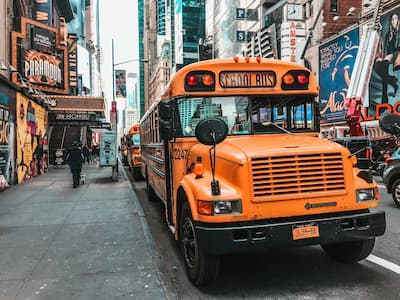





Every year, American high school students take SATs, which are standardized tests intended to measure literacy, numeracy, and writing skills. There are three sections - reading, math, and writing, each with a **maximum score of 800 points**. These tests are extremely important for students and colleges, as they play a pivotal role in the admissions process.

Analyzing the performance of schools is important for a variety of stakeholders, including policy and education professionals, researchers, government, and even parents considering which school their children should attend.

You have been provided with a dataset called `schools.csv`, which is previewed below.

You have been tasked with answering three key questions about New York City (NYC) public school SAT performance.





**Project Instructions:**

Which NYC schools have the best math results?


The best math results are at least 80% of the *maximum possible score of 800* for math.
Save your results in a pandas DataFrame called best_math_schools, including "school_name" and "average_math" columns, sorted by "average_math" in descending order.
What are the top 10 performing schools based on the combined SAT scores?



Save your results as a pandas DataFrame called top_10_schools containing the "school_name" and a new column named "total_SAT", with results ordered by "total_SAT" in descending order.
Which single borough has the largest standard deviation in the combined SAT score?



Save your results as a pandas DataFrame called largest_std_dev.
The DataFrame should contain one row, with:
"borough" - the name of the NYC borough with the largest standard deviation of "total_SAT".
"num_schools" - the number of schools in the borough.
"average_SAT" - the mean of "total_SAT".
"std_SAT" - the standard deviation of "total_SAT".
Round all numeric values to two decimal places.

In [1]:
# Re-run this cell
import pandas as pd

# Read in the data
schools = pd.read_csv("schools.csv")
# Preview the data
schools.head()

# Start coding here...
# Add as many cells as you like...

,school_name,borough,building_code,average_math,average_reading,average_writing,percent_tested
0,"New Explorations into Science, Technology and ...",Manhattan,M022,657,601,601,NaN
1,Essex Street Academy,Manhattan,M445,395,411,387,78.9
2,Lower Manhattan Arts Academy,Manhattan,M445,418,428,415,65.1
3,High School for Dual Language and Asian Studies,Manhattan,M445,613,453,463,95.9
4,Henry Street School for International Studies,Manhattan,M056,410,406,381,59.7


In [2]:
#1/Finding schools with the best math scores
best_math_schools=schools[schools['average_math']>=640][["school_name",'average_math']].sort_values(by="average_math",ascending=False)
print(best_math_schools.head())

                                           school_name  average_math
88                              Stuyvesant High School           754
170                       Bronx High School of Science           714
93                 Staten Island Technical High School           711
365  Queens High School for the Sciences at York Co...           701
68   High School for Mathematics, Science, and Engi...           683


In [3]:
#2/Identifying the top 10 performing schools
schools["total_SAT"]=schools['average_writing']+schools['average_math']+schools['average_reading']
top_10_schools = schools.sort_values("total_SAT", ascending=False)[["school_name", "total_SAT"]].head(10)

print(top_10_schools)

                                           school_name  total_SAT
88                              Stuyvesant High School       2144
170                       Bronx High School of Science       2041
93                 Staten Island Technical High School       2041
174  High School of American Studies at Lehman College       2013
333                        Townsend Harris High School       1981
365  Queens High School for the Sciences at York Co...       1947
5                       Bard High School Early College       1914
280                     Brooklyn Technical High School       1896
45                       Eleanor Roosevelt High School       1889
68   High School for Mathematics, Science, and Engi...       1889


In [4]:
#3/Locating the NYC borough with the largest standard deviation in SAT performance
import numpy as np

boroughs = schools.groupby("borough")["total_SAT"].agg(["count", "mean", "std"]).round(2)
print(boroughs)

largest_std_dev = boroughs[boroughs["std"] == boroughs["std"].max()]
largest_std_dev = largest_std_dev.rename(columns={"count": "num_schools", "mean": "average_SAT", "std": "std_SAT"})
# Move borough from index to column
largest_std_dev.reset_index(inplace=True)
print("************************")
print(largest_std_dev)

               count     mean     std
borough                              
Bronx             98  1202.72  150.39
Brooklyn         109  1230.26  154.87
Manhattan         89  1340.13  230.29
Queens            69  1345.48  195.25
Staten Island     10  1439.00  222.30
************************
     borough  num_schools  average_SAT  std_SAT
0  Manhattan           89      1340.13   230.29
